In [1]:
from py2neo import Graph, Node, Relationship
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gdb = Graph(user='neo4j', password='naiin')

q = """
MATCH (u:Product) RETURN u.name AS name, size((u)-[]->(:Attribute)) AS degree
"""
res = gdb.run(q)
NodeDegree = pd.DataFrame(res)

In [2]:
NodeDegree = NodeDegree.rename(columns={0: "name", 1: "degree"})

In [3]:
NodeDegree.head()

,name,degree
0,Box set แฮร์รี่ พอตเตอร์ ฉบับครบรอบ 20ปี (ปกแข็ง),6
1,แพ็กชุด แฮร์รี่ พอตเตอร์ ฉบับครบรอบ 20ปี (ปกอ่อน),6
2,แฮร์รี่พอตเตอร์กับภาคีนกฟีนิกซ์ล.5 20ปี,6
3,แฮร์รี่พอตเตอร์กับเจ้าชายเลือดผสมล.6 20ป,6
4,แฮร์รี่พอตเตอร์กับห้องแห่งความลับ ล2 20ป,6


In [4]:
def plot_degree_dist(degree):
    # matplotlib histogram
    plt.hist(degree['degree'], color = 'blue', edgecolor = 'black',
         bins = int(180/10))

    # seaborn histogram
    sns.distplot(degree['degree'], hist=True, kde=False, 
             bins=int(180/10), color = 'blue',
             hist_kws={'edgecolor':'black'})
    # Add labels
    plt.title('Histogram of degree')
    plt.xlabel('Degree')
    plt.ylabel('Count')

In [5]:
def plot_dist(degree):
    # Density Plot and Histogram of all arrival delays
    sns.distplot(degree['degree'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
    # Add labels
    plt.title('Density and Histogram of degree')
    plt.xlabel('Degree')
    plt.ylabel('Density')

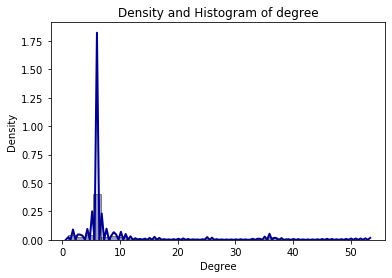

In [6]:
plot_dist(NodeDegree)

In [8]:
q = """
MATCH (u:jib) RETURN u.name AS name, size((u)-[]->(:Attribute)) AS degree
"""
res = gdb.run(q)
NodeDegree_jib = pd.DataFrame(res)
NodeDegree_jib = NodeDegree_jib.rename(columns={0: "name", 1: "degree"})

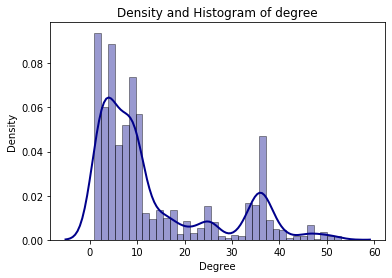

In [9]:
plot_dist(NodeDegree_jib)

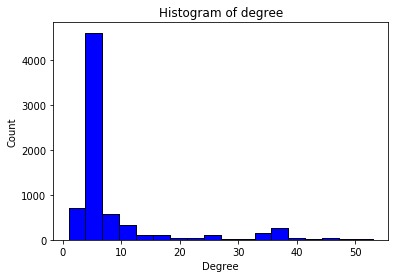

In [7]:
plot_degree_dist(NodeDegree)